# About Dataset
This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

# Source
The data was procured from thyroid disease datasets provided by the UCI Machine Learning Repository.

# Content
The size for the file featured within this Kaggle dataset is shown below — along with a list of attributes, and their description summaries:

Age: The age of the patient at the time of diagnosis or treatment.

Gender: The gender of the patient (male or female).

Smoking: Whether the patient is a smoker or not.

Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).

Hx Radiotherapy: History of radiotherapy treatment for any condition.

Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.

Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.

Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.

Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.

Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).

Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.

T: Tumor classification based on its size and extent of invasion into nearby structures.

N: Nodal classification indicating the involvement of lymph nodes.

M: Metastasis classification indicating the presence or absence of distant metastases.

Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.

Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.

Recurred: Indicates whether the cancer has recurred after initial treatment.

# The Ml prediction is to predict whether the thyroid will recurred[to happen again periodically] after all the treatment

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
Data = pd.read_csv("C:\Thyroid_Diff.csv")
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [3]:
Data = Data.rename(columns = {'Hx Radiothreapy':'Hx_Radiothreapy', 'Thyroid Function':'Thyroid_Function', 'Physical Examination':'Physical_Examination'})
Data.drop(columns=['Hx Smoking','T','N','M'], inplace=True)
Data.head()

,Age,Gender,Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response,Recurred
0,27,F,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,I,Indeterminate,No
1,34,F,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,I,Excellent,No
2,30,F,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,I,Excellent,No
3,62,F,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,I,Excellent,No
4,62,F,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,I,Excellent,No


In [4]:
Data.Recurred.unique()

array(['No', 'Yes'], dtype=object)

In [5]:
# Data.Thyroid Function.unique()
Data.columns

Index(['Age', 'Gender', 'Smoking', 'Hx_Radiothreapy', 'Thyroid_Function',
       'Physical_Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
       'Stage', 'Response', 'Recurred'],
      dtype='object')

In [6]:
# checking for missing value
Data[Data.isnull()].any()

Age                     False
Gender                  False
Smoking                 False
Hx_Radiothreapy         False
Thyroid_Function        False
Physical_Examination    False
Adenopathy              False
Pathology               False
Focality                False
Risk                    False
Stage                   False
Response                False
Recurred                False
dtype: bool

In [7]:
# shape of the dataset
Data.shape

(383, 13)

In [8]:
X = Data.drop(columns=["Recurred"])  #feature
y = Data["Recurred"] #target

# preprocessing categorical features and target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 

# features[X]
X_cat = X.select_dtypes(include=['object']).columns
for items in X_cat:   #(to iterate over all the features columns since they're  more than 1(we have 11 cat columns, 1 num column))
    X[items] = encoder.fit_transform(X[items])
# X

# target[y]
y = encoder.fit_transform(y)
# y
# X

In [9]:
# splitting into train and test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=42)

# standardizing numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# j = pd.DataFrame(Xtest_scaled)
# j

In [12]:
from sklearn.linear_model import LogisticRegression 
regression = LogisticRegression(random_state=42)
regression.fit(Xtrain_scaled, ytrain)

y_pred = regression.predict(Xtest_scaled)
# print('prediction:', y_pred)
# print('actual:', ytest)

from sklearn.metrics import classification_report, accuracy_score
score = regression.score(Xtrain_scaled, ytrain)
print('score:', score)

report = classification_report(ytest, y_pred)
print(report)


score: 0.9248366013071896
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.79      0.88        19

    accuracy                           0.95        77
   macro avg       0.97      0.89      0.92        77
weighted avg       0.95      0.95      0.95        77



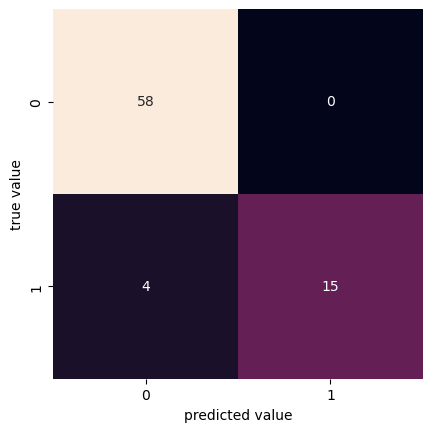

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');